In [4]:
#Import 'load_iris' to load the dataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score

#import numpy to perform mathematical operation
import numpy as np

#import matplotlib to visualize the data
import matplotlib.pyplot as plt




Line number : 150
Row number : 4
First few row of the dataset : 
Sample 1: [5.1 3.5 1.4 0.2]
Sample 2: [4.9 3.  1.4 0.2]
Sample 3: [4.7 3.2 1.3 0.2]
Sample 4: [4.6 3.1 1.5 0.2]
Sample 5: [5.  3.6 1.4 0.2]
Number of Features  4

 Row Features  : 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Statistical Analysis :
Feature 0 :
Mean : 5.843333333333334
Standard deviation :  0.8253012917851409
Maximum :  7.9
Minimum :  4.3
Feature 1 :
Mean : 3.0573333333333337
Standard deviation :  0.4344109677354946
Maximum :  4.4
Minimum :  2.0
Feature 2 :
Mean : 3.7580000000000005
Standard deviation :  1.759404065775303
Maximum :  6.9
Minimum :  1.0
Feature 3 :
Mean : 1.1993333333333336
Standard deviation :  0.7596926279021594
Maximum :  2.5
Minimum :  0.1


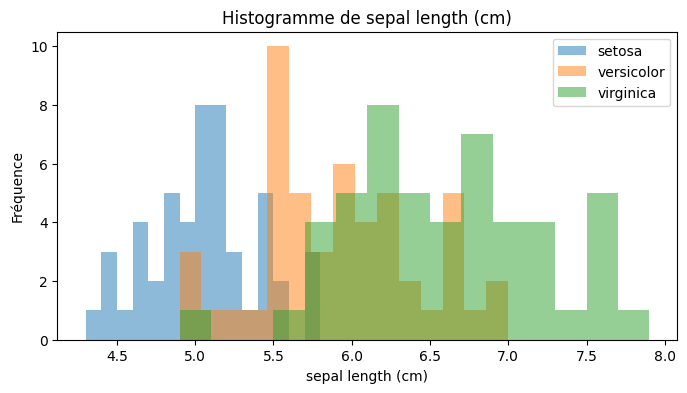

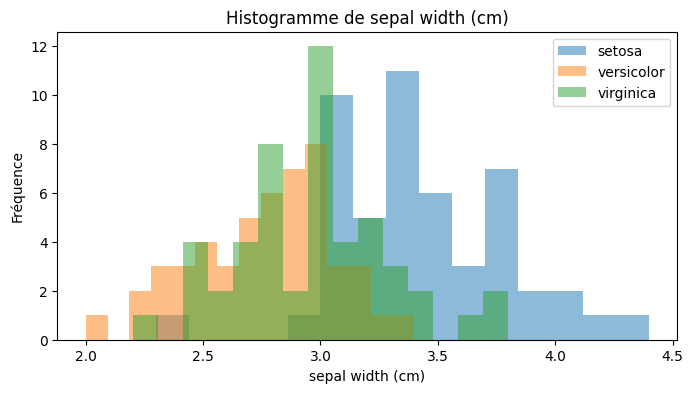

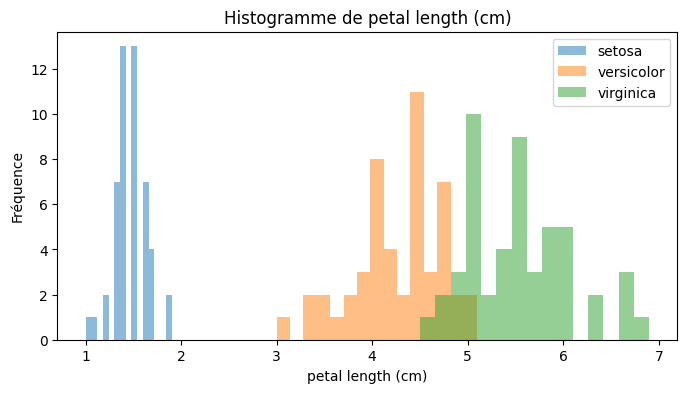

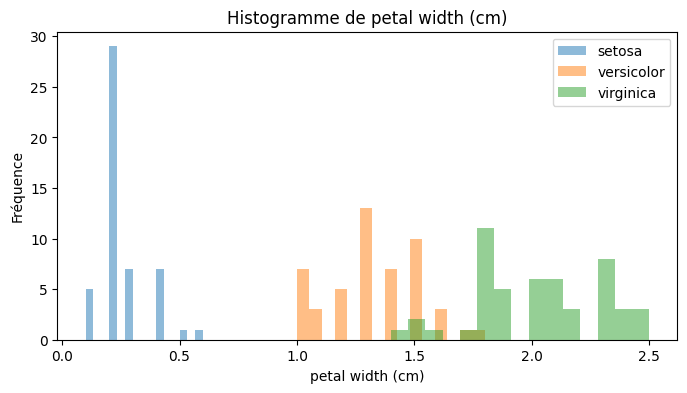

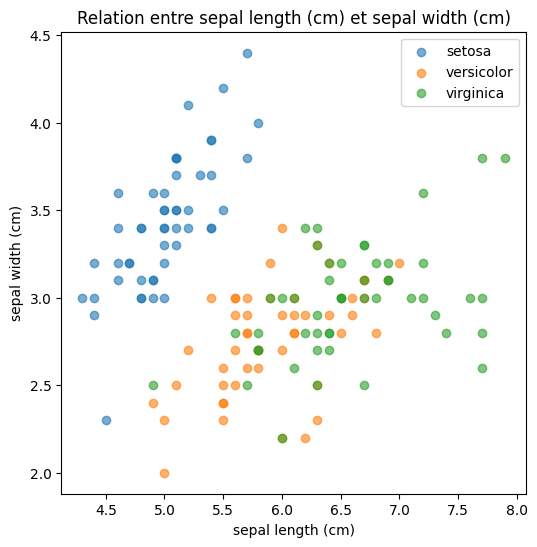

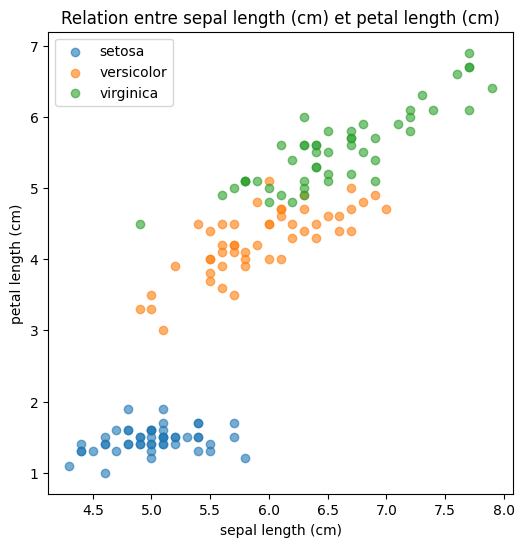

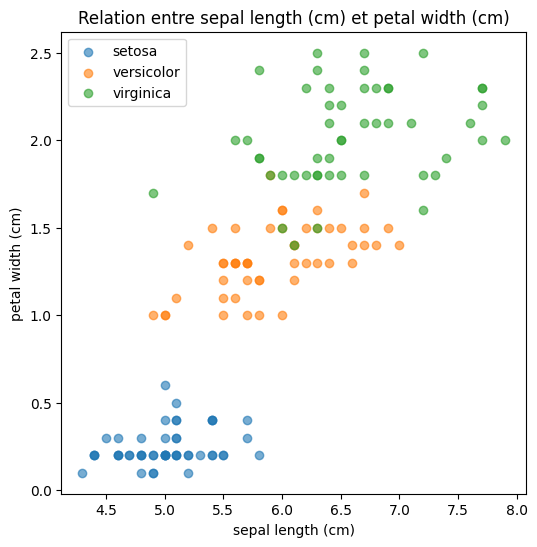

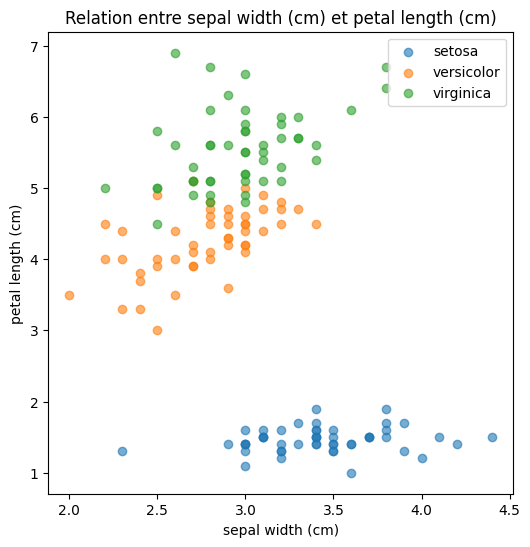

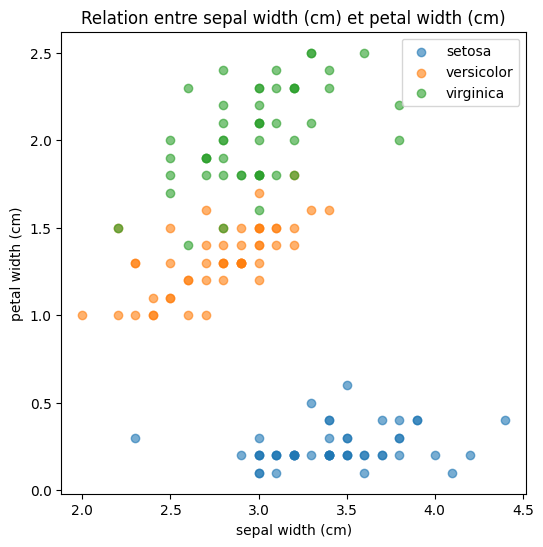

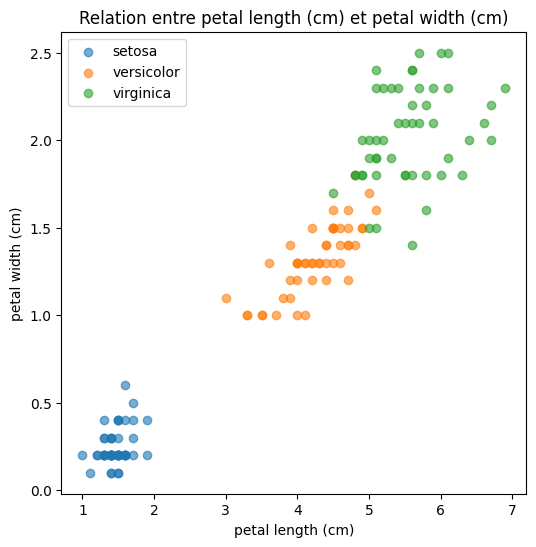

In [5]:
#data exploration
iris = load_iris()

features = iris.data
feature_names = iris.feature_names

#--------------------------------
#Initial Analysis
print("Line number :",features.shape[0])
print("Row number :",features.shape[1])
print("First few row of the dataset : ")
for i in range(5):
    print("Sample " + str(i + 1) + ": " + str(features[i]))
print("Number of Features ",len(feature_names))
print("\n Row Features  : ")
for name in feature_names:
    print("- " + name)

#--------------------------------
#Statistical Analysis
print("\nStatistical Analysis :")
for i in range(len(feature_names)):
    feature_column = features[:, i]
    print("Feature "+str(i)+" :")
    mean = np.mean(feature_column)
    print("Mean : "+ str(mean))
    deviation = np.std(feature_column)
    print("Standard deviation : ",str(deviation))
    max_F = np.max(feature_column)
    print("Maximum : ",str(max_F))
    min_F = np.min(feature_column)
    print("Minimum : ",str(min_F))
    
#--------------------------------
#Visualization
#a verifier j'ai rien compris au code, peut etre faire des different plot, plus pertinent ? 
target = iris.target
target_names = iris.target_names

for i in range(features.shape[1]):  
    plt.figure(figsize=(8, 4))
    for target_value, species in enumerate(target_names):
        plt.hist(features[target == target_value, i], alpha=0.5, label=species, bins=15)
    plt.title(f"Histogramme de {feature_names[i]}")
    plt.xlabel(feature_names[i])
    plt.ylabel("Fréquence")
    plt.legend(loc="upper right")
    plt.show()

for i in range(features.shape[1]):
    for j in range(i + 1, features.shape[1]):
        plt.figure(figsize=(6, 6))
        for target_value, species in enumerate(target_names):
            plt.scatter(features[target == target_value, i], features[target == target_value, j], label=species, alpha=0.6)
        plt.title(f"Relation entre {feature_names[i]} et {feature_names[j]}")
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend(loc="best")
        plt.show()
   
    

In [6]:
#Data Preprocessing

#Handling Missing Values
missing_values = np.isnan(features)
print("Values who missing by features : ")
print(np.sum(missing_values, axis=0))

if np.any(missing_values):
    features[~np.any(missing_values, axis=1)] #delete the line where we have missing data.
    #------------------------ OR 
    #imputing values with the mean.
    for i in range(features.shape[1]):
        column = features[:, i]
        column[np.isnan(column)] = np.nanmean(column)

#Feature Scaling
min_max_scaler = MinMaxScaler()
print(min_max_scaler)
features_minmax_scaled = min_max_scaler.fit_transform(features)
print("After MinMaxScaler")
print("Mean of each Feature : ", np.mean(features_minmax_scaled, axis=0))
print("Deviation of each Feature : ", np.std(features_minmax_scaled, axis=0))

standard_scaler = StandardScaler()
features_standard_scaled = standard_scaler.fit_transform(features)
print("StandardScaler")
print("Mean of each Feature : ", np.mean(features_standard_scaled, axis=0))
print("Deviation of each Feature : ", np.std(features_standard_scaled, axis=0))

#Encoding Categorical Varaibles 

Values who missing by features : 
[0 0 0 0]
MinMaxScaler()
After MinMaxScaler
Mean of each Feature :  [0.4287037  0.44055556 0.46745763 0.45805556]
Deviation of each Feature :  [0.22925036 0.18100457 0.29820408 0.31653859]
StandardScaler
Mean of each Feature :  [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Deviation of each Feature :  [1. 1. 1. 1.]


In [7]:
#Model Selection 

X = iris.data  # Features
y = iris.target  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

for model_name, model in models.items():
    print("Model Name :", model_name)
    
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-validation scores :", scores)
    print("Average score :", np.mean(scores))
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, predictions)
    print("Test set accuracy :", test_accuracy)
#We choose the 'Logistic Regression' due to it's better Cross Validation score

Model Name : KNN
Cross-validation scores : [0.95833333 0.95833333 0.83333333 1.         0.95833333]
Average score : 0.9416666666666667
Test set accuracy : 1.0
Model Name : Decision Tree
Cross-validation scores : [0.95833333 1.         0.83333333 0.95833333 0.95833333]
Average score : 0.9416666666666668
Test set accuracy : 1.0
Model Name : Random Forest
Cross-validation scores : [0.95833333 0.95833333 0.83333333 1.         0.95833333]
Average score : 0.9416666666666667
Test set accuracy : 1.0
Model Name : Logistic Regression
Cross-validation scores : [1.         1.         0.875      1.         0.95833333]
Average score : 0.9666666666666666
Test set accuracy : 1.0


In [8]:
#Training and Evaluation

#Training, we choose the right model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

#--------------------------------
#Model Evaluation
y_pred = model.predict(X_test)

print("Model Evaluation:")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

#JE NE SAIS PAS COMMENT UTILISER AUC-ROC curve

#Implement cross-validation to assess the model's performance more robustly. Use techniques
#like k-fold cross-validation

Model Evaluation:
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0


In [9]:
#Result Analysis : 
for model_name, model in models.items():
    print("Model Name:", model_name)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

#Peut-etre plot les differences ? 

Model Name: KNN
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Model Name: Decision Tree
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Model Name: Random Forest
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Model Name: Logistic Regression
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
